In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.path as mpath
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import os
import csv
from matplotlib.gridspec import GridSpec
import re
import pickle
import scipy

In [3]:
def kernel(x, loc):
    out = 0
    for i in [-1,0,1]:
        out += 0.5*np.exp(-(25.0*((x+(i)) - loc))**(2));
    return out

In [4]:
def rust_k_circ(ts, vs):
    with open("temp.csv" , mode= "w") as f:
        wtr = csv.writer(f)

        wtr.writerow(ts)
        wtr.writerow(vs)

    current_path = os.getcwd()
    rust_path = f"{current_path}/ripleys_k/target/release/ripleys_k"
    
    os.system(f"{rust_path} {current_path}/temp.csv {current_path}/temp_out.csv 1")

    with open("temp_out.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out = [float(a) for a in v]
            break
    
    os.system(f"rm {current_path}/temp.csv")
    os.system(f"rm {current_path}/temp_out.csv")
    return out

def expectation_diff(vs, res=50):
    ts = np.linspace(0,0.5,res)
    ks = rust_k_circ(ts,vs)
    ex_ks = 2*ts
    diffs = np.abs(ks-ex_ks)
    return np.average(diffs), ts, ks

def red(vs, h_width, res=50):
    vs = np.array(vs) / (h_width)
    ts = np.linspace(0,0.5,res)
    ks = rust_k_circ(ts,vs)
    ex_ks = 2*ts
    diffs = np.abs(ks-ex_ks)
    return np.average(diffs)


In [5]:
def get_final(dir_to_get, ic_file = False):
    out = []
    run_len = len(os.listdir(dir_to_get)) if not ic_file else len(os.listdir(dir_to_get))-1

    with open(dir_to_get+f"{run_len-1}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        return out

def get_ics(dir_to_get, ic_file=False):
    out = []
    run_len = len(os.listdir(dir_to_get))
    with open(dir_to_get+f"{0}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        return out


def get_all(dir_to_get):
    out = []
    temp_dir_list = os.listdir(dir_to_get); dir_list = []
    for fi in temp_dir_list:
        if fi != "ic.csv": dir_list.append(fi)
    runs = np.sort([int(a[0:-4]) for a in dir_list])
    for run in runs:
        run_out = []
        with open(dir_to_get+f"{run}.csv") as f:
            reader = csv.reader(f)

            for v in reader:
                run_out.append([float(a) for a in v])
        out.append(run_out)
    return out

def get_file(f_to_get):
    out = []
    with open(f_to_get) as f:
        reader = csv.reader(f)
        for v in reader:
            out.append([float(a) for a in v])
    return out
    

Average Taxis/Diffusion Sensitivity of 5 different initial conditions.

In [8]:
# t_sens_dir = "/media/jonatank/PG/HML/t_test_finals"
# fs = os.listdir(t_sens_dir)

# ics, ts, ds = [],[],[]
# for f in fs:
#     ic = re.search("ic_([\w.]*).t_", f).group(1)
#     t = re.search("t_([\w.]*).d_", f).group(1)
#     d = re.search("d_([\w.]*).csv", f).group(1)

#     ics.append(ic)
#     ts.append(t)
#     ds.append(d)

# ics = np.sort([float(i) for i in list(set(ics))])
# ts = np.sort([float(i) for i in list(set(ts))])
# ds = np.sort([float(i) for i in list(set(ds))])

ics = np.linspace(0,4,5)
ts = np.linspace(0,0.5,30)
ds = np.linspace(0,0.3,30)

with open("/media/jonatank/PG/HML/main_t_sens_itd.pkl", "rb") as f:
    rips_dict = pickle.load(f)

data = []
for ic in ics:
    t1 = []
    for t in ts:
        t0=[]
        for d in ds:
            t0.append(rips_dict[(ic,t,d)])
        t1.append(t0)
    data.append(t1)
data = np.mean(data,axis=0)

FileNotFoundError: [Errno 2] No such file or directory: '/media/jonatank/PG/HML/main_t_sens_itd.pkl'

NameError: name 'data' is not defined

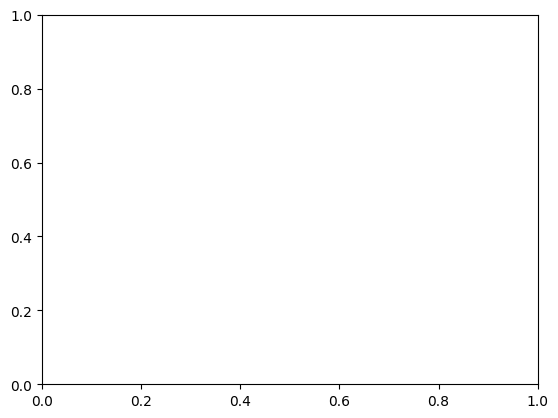

In [6]:
fig, ax = plt.subplots()
# pos = ax.imshow(taxis_data_avg, origin="lower", cmap="inferno", vmin=0.0, vmax=0.5)
pos = ax.imshow(data, origin="lower", cmap="inferno", vmin=0.0)

fig.colorbar(pos)
# ax.set_title(r"$D$ vs $u$ vs $\widehat{K}_\circ$")
ax.set_xlabel("$D$")
ax.set_ylabel("$u$")
ax.set_xticks([0,29], [ds[0],ds[-1]])
ax.set_yticks([0,29], [ts[0], ts[-1]])

D = np.linspace(0,29,200)
ax.plot(D, (3/5)*D,color="w")
ax.text(24,13,"$D=u$",color="w",fontsize=15)

plt.show()

Average Memory/Diffusion Sensitivity of 5 different initial conditions.

In [7]:
eks_mean = np.transpose(np.load("/media/jonatank/PG/HML/mem_sens_final_ks_avg.npy"))
mem_list = np.load("/media/jonatank/PG/HML/mem_sens_mlist.npy")
diff_list = np.load("/media/jonatank/PG/HML/mem_sens_dlist.npy")
fig, ax = plt.subplots()
# im = ax.imshow(eks_mean, origin="lower", cmap="inferno", vmin=0,vmax=0.5)
im = ax.imshow(eks_mean, origin="lower", cmap="inferno", vmin=0)
fig.colorbar(im)
# ax.set_title(r"$D$ vs $v$ vs $\widehat{K}_\circ$")
ax.set_yticks([0,29],[np.min(mem_list), np.max(mem_list)])
ax.set_xticks([0,29],[np.min(diff_list), np.max(diff_list)])
ax.set_ylabel("$v$")
ax.set_xlabel("$D$")
D=np.linspace(0,29,100)
ax.plot(D,(3/5)*D, color="w")
ax.text(24,13,"$D=v$",color="w",fontsize=15)


FileNotFoundError: [Errno 2] No such file or directory: '/media/jonatank/PG/HML/mem_sens_final_ks_avg.npy'

Initial Condition Variance

In [8]:
def is_not_mixed(arr, thresh):
    p0 = np.all([i<thresh for i in arr])
    p1 = np.all([i>=thresh for i in arr])
    return p0 or p1

eks = np.transpose(np.load("/media/jonatank/PG/HML/mem_sens_final_ks.npy"))
vars = []
for i in range(30):
    temp_vars = []
    for j in range(30):
        temp_vars.append(is_not_mixed(eks[i,j], 0.02))
    vars.append(temp_vars)
ax.set_yticks([0,29],[np.min(mem_list), np.max(mem_list)])
ax.set_xticks([0,29],[np.min(diff_list), np.max(diff_list)])
ax.set_ylabel("$v$")
ax.set_xlabel("$D$")

fig, ax =plt.subplots()    
im = ax.imshow(vars, origin="lower",cmap="grey")
cbar = fig.colorbar(im, ticks=[0,1])
cbar.ax.set_yticklabels(["Mixed", "Unmixed"])

FileNotFoundError: [Errno 2] No such file or directory: '/media/jonatank/PG/HML/mem_sens_final_ks.npy'

Taxis Speed Sensitivity

In [9]:
# slice_index = 8
pop_out_indexes = [0,14,20]
# pop_out_indexes = [19,20,25]
# eks_mean = np.load("/media/jonatank/PG/HML/taxis_sens_final_ks_avg.npy")
# eks = np.load("/media/jonatank/PG/HML/taxis_sens_final_ks.npy")
# taxis_list = np.load("/media/jonatank/PG/HML/taxis_sens_tlist.npy")
# diff_list = np.load("/media/jonatank/PG/HML/taxis_sens_dlist.npy")
# slice_mean = eks_mean[:,slice_index]
# slice_list = [eks[i][:,slice_index] for i in range(5)]
# slice_var = np.var(slice_list, axis=0)

diff = 0.083
t_dir = "taxis_quick_long"
# t_dir = "taxis_quick"
# ics_dirs = np.sort(os.listdir("taxis_quick"))
# taxis_dirs = np.sort(os.listdir(f"taxis_quick/{ics_dirs[4]}/"))
ics_dirs = np.sort(os.listdir(t_dir))
taxis_dirs = np.sort(os.listdir(f"{t_dir}/{ics_dirs[4]}/"))
taxis_list = np.array([float(i[6:]) for i in taxis_dirs])
slice_list= []
for ic_dir in ics_dirs:
    t_ks = []
    for taxis_dir in taxis_dirs:
        s,f = get_final(f"{t_dir}/{ic_dir}/{taxis_dir}/")
        # s,f = get_final(f"taxis_quick/{ic_dir}/{taxis_dir}/")
        k = expectation_diff(s)[0]
        t_ks.append(k)
    slice_list.append(t_ks)

slice_mean = np.array([np.mean(a) for a in np.transpose(slice_list)])
slice_var = np.array([np.var(a) for a in np.transpose(slice_list)])
slice_max = np.array([np.max(a) for a in np.transpose(slice_list)])
slice_min = np.array([np.min(a) for a in np.transpose(slice_list)])



fig = plt.figure()
gs = GridSpec(3,3,  figure = fig, height_ratios=[3,4,1])
axtop = fig.add_subplot(gs[0,:])
axtop.plot(taxis_list, slice_mean, label="Mean")
axtop.fill_between(taxis_list, slice_min, slice_max - slice_var, alpha=0.5, color='#089fff', label="Variance")
# axtop.fill_between(taxis_list, slice_mean+slice_var, slice_mean - slice_var, alpha=0.5, color='#089fff', label="Variance")
axtop.scatter([taxis_list[i] for i in pop_out_indexes], [slice_mean[i] for i in pop_out_indexes], color="r")
# offsets = [[0.01,0],[0.01,-0.02],[0, 0.01]]
offsets = [[0,0] for i in range(3)]
for letter, p in enumerate(pop_out_indexes):
    axtop.text(taxis_list[p]+offsets[letter][0], slice_mean[p]+ offsets[letter][1], ["A","B","C"][letter])
axtop.legend()
axmid = []
for i in range(3):
    axmid.append(fig.add_subplot(gs[1,i]))
axbot = []
for i in range(3):
    axbot.append(fig.add_subplot(gs[2,i]))

for i in range(3):
    # a = get_all(f"/media/jonatank/PG/HML/taxis_sens_0/taxis_{taxis_list[pop_out_indexes[i]]}/diff_{diff_list[slice_index]}/")
    a = get_all(f"{t_dir}/{ics_dirs[4]}/{taxis_dirs[pop_out_indexes[i]]}/")
    ss = [s[0] for s in a]
    fs = [f[1] for f in a]
    l=len(a)-1
    axbot[i].scatter(ss[l], [3/4 for _ in ss[l]], alpha=0.15)
    axbot[i].scatter(fs[l], [1/4 for _ in fs[l]], alpha=0.05)
    # ax[0][0].set_ylabel("Time")
    axbot[i].set_xlabel("Location")
    axmid[i].set_xlabel("Location")
    for c in range(0,l,5):
        axmid[i].scatter(ss[c],np.zeros_like(ss[c])+c,alpha=0.05, color="b",marker=".")
    axmid[i].set_title(f"Example {['A', 'B', 'C'][i]}")
    axmid[i].set_ylim(0,l)
    axmid[i].invert_yaxis()
    axbot[i].set_ylim(0,1)
    axmid[i].set_yticks([0,l])
    axmid[i].set_xticks([0,1])
    axbot[i].set_xticks([0,1])
    axmid[i].set_xlim([0,1])
    axbot[i].set_xlim([0,1])
    axbot[i].set_yticks([1/4,3/4])
    axbot[i].set_yticklabels(["Fish", "Shrimp"])
    axtop.set_xlabel("Taxis Range")
    axtop.set_ylabel("Ripley's K")

axmid[0].set_ylabel("Timestep")
# fig.suptitle(f"Taxis Speed Sensitivity ($\kappa =$ {round(diff_list[slice_index],3)})")
fig.suptitle(f"Taxis Speed Sensitivity ($\kappa = 0.083$)")
fig.tight_layout()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_figheight(8)
fig.set_figwidth(6)

<>:85: SyntaxWarning: invalid escape sequence '\k'
<>:85: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_21503/686305594.py:85: SyntaxWarning: invalid escape sequence '\k'
  fig.suptitle(f"Taxis Speed Sensitivity ($\kappa = 0.083$)")
/tmp/ipykernel_21503/686305594.py:85: SyntaxWarning: invalid escape sequence '\k'
  fig.suptitle(f"Taxis Speed Sensitivity ($\kappa = 0.083$)")


FileNotFoundError: [Errno 2] No such file or directory: 'taxis_quick_long'

Memory Speed Sensitivity

In [11]:
# slice_index = 8
slice_index = 11
pop_out_indexes = [0,8,20]
pop_out_runs = [3,3,3]
main_mem_dir = f"/media/jonatank/PG/HML/main_mem_sens/"

mem_flist = np.sort(os.listdir(f"{main_mem_dir}/run_0/"))
diff_flist = np.sort(os.listdir(f"{main_mem_dir}/run_0/{mem_flist[0]}"))
mem_list = [float(s[4:]) for s in mem_flist]
diff_list = [float(s[5:]) for s in diff_flist]

slice_list = []
for r in range(5):
    mem_ed = []
    for mf in mem_flist:
        distro = get_final(f"{main_mem_dir}run_{r}/{mf}/{diff_flist[slice_index]}/")[0]
        mem_ed.append(expectation_diff(distro)[0])
    slice_list.append(mem_ed) 
slice_mean = np.mean(slice_list,axis=0)
slice_var = np.var(slice_list, axis=0)
slice_max = np.max(slice_list, axis=0)
slice_min = np.min(slice_list, axis=0)

fig = plt.figure()
gs = GridSpec(3,3,  figure = fig, height_ratios=[3,4,1])
axtop = fig.add_subplot(gs[0,:])
axtop.plot(mem_list, slice_mean, label="Mean")
for i in range(5):
    if i ==0:
        axtop.plot(mem_list, slice_list[i], label=f"IC", color="grey", alpha=0.4)
    else:
        axtop.plot(mem_list, slice_list[i], color="grey", alpha=0.4)
axtop.fill_between(mem_list, slice_max, slice_min - slice_var, alpha=0.5, color='#089fff', label="Range")
axtop.scatter([mem_list[i] for i in pop_out_indexes], [slice_list[r][i] for r,i in zip(pop_out_runs, pop_out_indexes)], color="r")
offsets = [[0,0.01],[0,-0.03],[0, 0.01]]
for letter, p in enumerate(pop_out_indexes):
    axtop.text(mem_list[p]+offsets[letter][0], slice_list[pop_out_runs[letter]][p]+ offsets[letter][1], ["A","B","C"][letter])
axtop.legend()
axmid = []
for i in range(3):
    axmid.append(fig.add_subplot(gs[1,i]))
axbot = []
for i in range(3):
    axbot.append(fig.add_subplot(gs[2,i]))

for i in range(3):
    a = get_all(f"/media/jonatank/PG/HML/main_mem_sens/run_{pop_out_runs[i]}/mem_{mem_list[pop_out_indexes[i]]}/diff_{diff_list[slice_index]}/")
    ss = [s[0] for s in a]
    fs = [f[1] for f in a]
    l=450
    axbot[i].scatter(ss[l], [3/4 for _ in ss[l]], alpha=0.15)
    axbot[i].scatter(fs[l], [1/4 for _ in fs[l]], alpha=0.05)
    # ax[0][0].set_ylabel("Time")
    axbot[i].set_xlabel("Location")
    axmid[i].set_xlabel("Location")
    for c in range(0,l,5):
        axmid[i].scatter(ss[c],np.zeros_like(ss[c])+c,alpha=0.05, color="b",marker=".")
    axmid[i].set_title(f"Example {['A', 'B', 'C'][i]}")
    axmid[i].set_ylim(0,l)
    axmid[i].invert_yaxis()
    axbot[i].set_ylim(0,1)
    axmid[i].set_yticks([0,l])
    axmid[i].set_xticks([0,1])
    axbot[i].set_xticks([0,1])
    axbot[i].set_yticks([1/4,3/4])
    axbot[i].set_yticklabels(["Fish", "Shrimp"])
    axmid[i].set_xlim([0,1])
    axbot[i].set_xlim([0,1])
    axtop.set_xlabel("Memory Speed")
    axtop.set_ylabel("RED Value")

axmid[0].set_ylabel("Timestep")
fig.suptitle(f"$D =$ {round(diff_list[slice_index],3)}")
fig.tight_layout()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_figheight(8)
fig.set_figwidth(6)

FileNotFoundError: [Errno 2] No such file or directory: '/media/jonatank/PG/HML/main_mem_sens//run_0/'

FileNotFoundError: [Errno 2] No such file or directory: '/media/jonatank/PG/HML/fish.png'

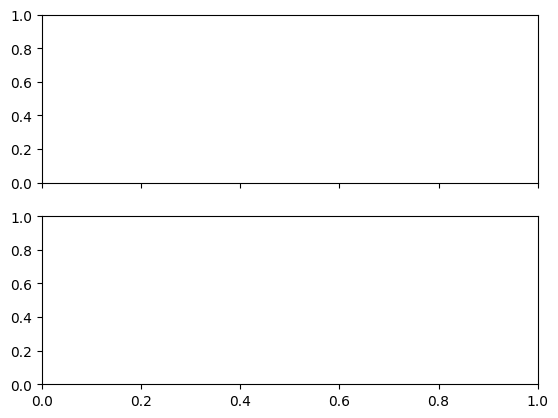

In [12]:
def mem_func(x):
    return 0.75-0.1*x
np.random.seed(1)
stations = [0.035,0.26,0.32,0.337,0.5,0.7]
x = np.linspace(0,1,300)
ind_kernals = [[kernel(x_v,s) for x_v in x] for s in stations]
K = np.sum(ind_kernals, axis=0) 
f_loc = 0.55
k_f_loc = K[np.argmin(np.absolute(x-f_loc))]
grad_offset = 0.03
grad = (K[np.argmin(np.absolute(x-f_loc))]-K[np.argmin(np.absolute(x-f_loc))+1])/((x[0]-x[1]))
taxis_x = 150
c=0.2
mem_dest = 0.69
mem = [f_loc, 0.31,mem_dest]
mem_rate=0.15
lab = True
fig, ax = plt.subplots(2,1,sharex=True)


for plot_num in [0,1]:
    image = plt.imread("/media/jonatank/PG/HML/fish.png")
    im = OffsetImage(image,zoom=0.030)
    ab = AnnotationBbox(im,(f_loc+0.028,1.05), xycoords='data', frameon=False)
    ax[plot_num].add_artist(ab)
    for k in ind_kernals:
        stren= 0.85
        if lab: 
            ax[plot_num].plot(x,k, color=stren*np.array([1,1,1]),zorder=0,label="$k_s(x)$", linestyle="--")
            lab=False
        else:
            ax[plot_num].plot(x,k, color=stren*np.array([1,1,1]),zorder=0,linestyle="--")
    ax[plot_num].plot(x,K, label="$K(x)$")
    ax[plot_num].scatter(stations, np.zeros_like(stations),zorder=10, label="Cleaning Station")
    ax[plot_num].scatter([f_loc],[1.05], label="Fish",color="orange",zorder=50)
    ax[plot_num].plot([f_loc,f_loc],[1.05,k_f_loc],alpha = 0.4,color="orange")
ax[0].plot([f_loc+grad_offset,f_loc-grad_offset],[k_f_loc+grad_offset*grad,k_f_loc-grad_offset*grad],color="r", linewidth=2)
ax[0].arrow(f_loc,1.05,-c,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
ax[0].plot([x[taxis_x],x[taxis_x]],[1.05,K[taxis_x]],alpha = 1,color="r",linestyle="--")
ax[0].arrow(f_loc,1.05,x[taxis_x]-f_loc,0,length_includes_head=True, head_width=0.05,head_length=0.02, edgecolor="r",facecolor='r', alpha=1)
ax[0].scatter([f_loc],[k_f_loc],color="r",s=20)
text_y_offsets=[-0,-0.1,-0.1]
for i,m in enumerate(mem):
    y = K[np.argmin(np.absolute(x-m))]
    ax[1].plot([m,m],[y*mem_func(i),y],color="purple", linewidth=1, alpha=0.8)
    ax[1].plot([m,m],[0,y*mem_func(i)],color="purple",linewidth = 2)
    ax[1].annotate(r"$\mathbf{m_"+str(i)+"}$",[m+0.008,y*mem_func(i)+text_y_offsets[i]],color="purple")
    ax[1].scatter([m],[y*mem_func(i)],marker="x",color="purple")
ax[1].arrow(f_loc,1.05,-mem_rate,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
ax[1].arrow(f_loc,1.05,mem_rate,0,length_includes_head=True, head_width=0.05,head_length=0.001, edgecolor="black", alpha=0.5)
ax[1].arrow(f_loc,1.05,mem_dest-f_loc,0,length_includes_head=True, head_width=0.05,head_length=0.02, edgecolor="purple",facecolor='purple', alpha=1)
ax[1].plot([mem_dest,mem_dest],[1.05,K[np.argmin(np.absolute(x-mem_dest))]],linestyle="--",color="purple")
ax[0].annotate(f"u",[f_loc-c/2,1.08],color="black",alpha=0.8)
ax[1].annotate(f"v",[f_loc+0.08,1.08],color="black",alpha=0.8)
ax[1].annotate(f"v",[f_loc-0.08,1.08],color="black",alpha=0.8)
plt.xlim(0,1)
for plot_num in [0,1]:
    ax[plot_num].set_ylim(-0.1,1.2)
plt.xlabel("Location")
plt.xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].set_ylabel("Kernel Height")
ax[1].set_ylabel("Kernel Height")
ax[0].set_title("Taxis based Movement")
ax[1].set_title("Memory based Movement")
# plt.legend()

In [29]:
base_dir0 = '/home/jonatank/Documents/HML/hml_fp/trial_runs/ic_sens_mem_const/'
base_dir1 = '/home/jonatank/Documents/HML/hml_fp/trial_runs/ic_sens_mem_const_clump/'
base_dir2 = '/home/jonatank/Documents/HML/hml_fp/trial_runs/ic_sens_mem_const_wide/'
bdirs = [base_dir0,base_dir2,base_dir1]
data = []
for bdir in bdirs:
    data0 = []
    for r in range(5):
        r_dir = bdir + f"ics_{r}/"
        r_list = []
        for i in range(100):
            s, f = get_final(f"{r_dir}{i}/")
            red = expectation_diff(s)[0]
            r_list.append(red)
        data0.append(r_list)
    data.append(data0)

In [30]:
ics = []
for r in range(5):
    ics.append(get_ics(base_dir0 + f"ics_{r}/0/"))

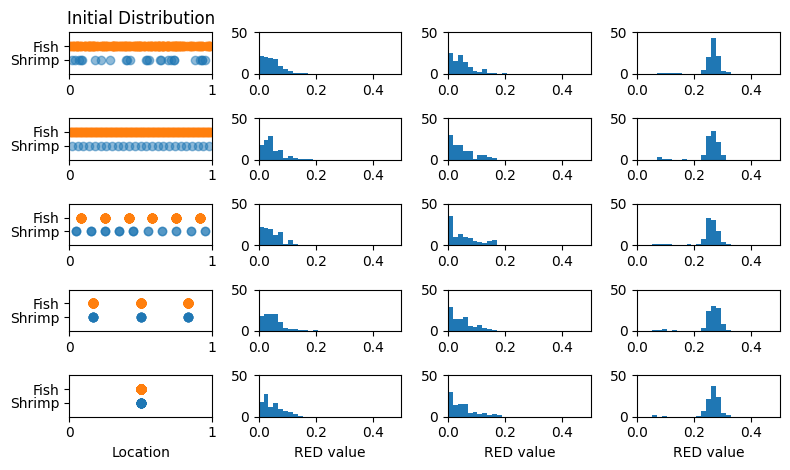

In [32]:
fig, ax = plt.subplots(5,4)
ax[0][0].set_title("Initial Distribution")
for j in [1,2,3]:
    ax[4][j].set_xlabel("RED value")
ax[4][0].set_xlabel("Location")
for i in range(5):
    for a in range(3):
        ax[i][a+1].hist(data[a][i],np.linspace(0,0.5,30))
        ax[i][a+1].set_xlim(0,0.5)
        ax[i][a+1].set_ylim(0,50)
    ax[i][0].set_ylim(0,1)
    ax[i][0].set_xlim(0,1)
    ax[i][0].set_xticks([0,1])
    ax[i][0].set_yticks([1/3,2/3])
    ax[i][0].set_yticklabels(["Shrimp", "Fish"])
    ax[i][0].scatter(ics[i][0], np.zeros_like(ics[i][0])+(1/3),alpha=0.5)
    ax[i][0].scatter(ics[i][1], np.zeros_like(ics[i][1])+(2/3),alpha=0.5)
fig.set_figwidth(8)
fig.tight_layout()

Ratio Sensitivity

In [65]:
base_dir = "/home/jonatank/Documents/HML/hml_fp/trial_runs/ratio_test_1/"
ratios_dirs = np.sort(os.listdir(base_dir))
ratios = [float(i[2:]) for i in ratios_dirs]
d = []
for i, ratio in enumerate(ratios):
    ratio_reds = []
    for run in range(10):
        s, f = get_final(f"{base_dir}/{ratios_dirs[i]}/{run}/", True)
        red = expectation_diff(s)[0]
        ratio_reds.append(red)
    d.append(ratio_reds)

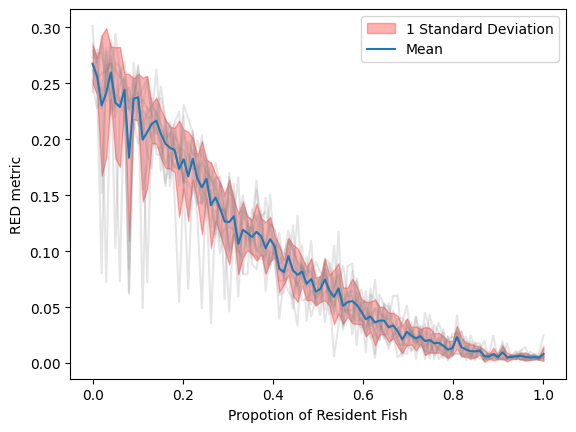

In [92]:
d_bar = np.mean(d, axis=1)
d_std = np.std(d, axis=1)
for d_samp in np.transpose(d):
    plt.plot(ratios, d_samp,alpha=0.2,color="grey")
plt.fill_between(ratios, d_bar+d_std, d_bar-d_std, label="1 Standard Deviation",color = "red", alpha=0.3)
plt.plot(ratios, d_bar,label="Mean")
plt.legend()
plt.xlabel("Propotion of Resident Fish")
plt.ylabel("RED metric")
# c=np.polyfit(ratios, d_bar,2)
# plt.plot(ratios, np.polynomial.polynomial.polyval(ratios,np.flip(c)))
plt.show()

In [45]:
dt = get_all("/home/jonatank/Documents/HML/hml_fp/trial_runs/high_width_test/t/")
dm = get_all("/home/jonatank/Documents/HML/hml_fp/trial_runs/high_width_test/m/")
sst = [i[0] for i in dt]
fst = [i[1] for i in dt]
ssm = [i[0] for i in dm]
fsm = [i[1] for i in dm]

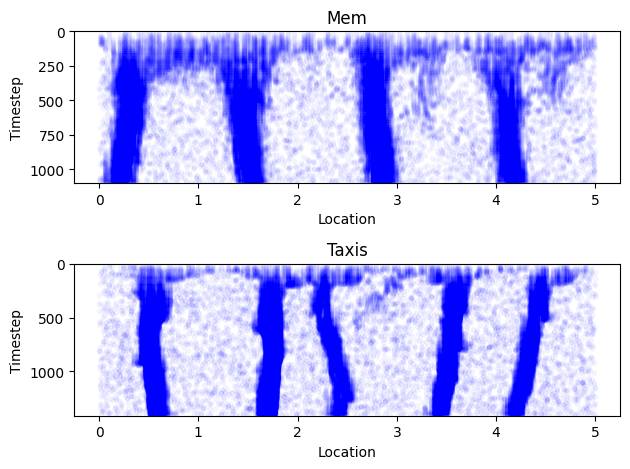

In [46]:
fig, ax = plt.subplots(2,1)
# for c in range(0,len(ss)):
for c in range(0,len(ssm),5):
    ax[0].scatter(ssm[c],np.zeros_like(ssm[c])+c,alpha=0.01, color="b",marker=".")
ax[0].set_ylabel("Timestep")
ax[0].set_xlabel("Location")
ax[0].set_ylim([len(ssm),0])
ax[0].set_title("Mem")

# for c in range(0,len(fs)):
for c in range(0,len(sst),5):
    ax[1].scatter(sst[c],np.zeros_like(sst[c])+c,alpha=0.01, color="b",marker=".")
ax[1].set_ylabel("Timestep")
ax[1].set_xlabel("Location")
ax[1].set_title("Taxis")
ax[1].set_ylim([len(sst),0])

fig.tight_layout()

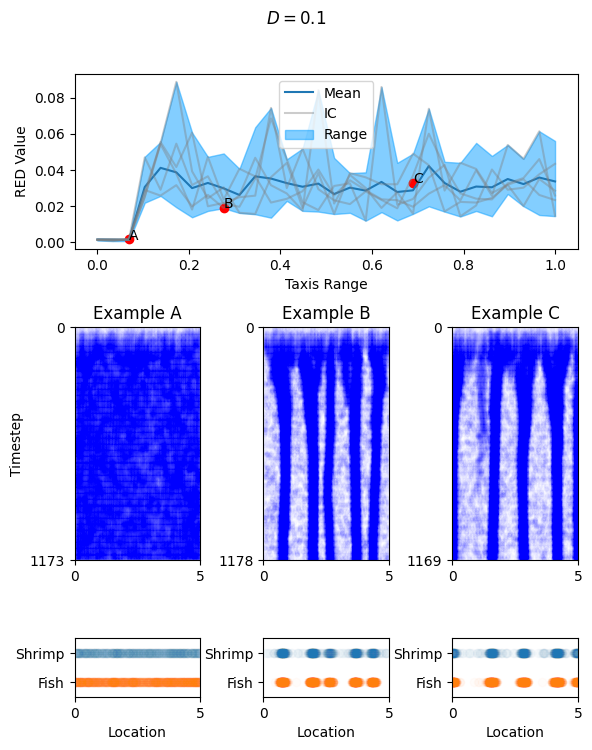

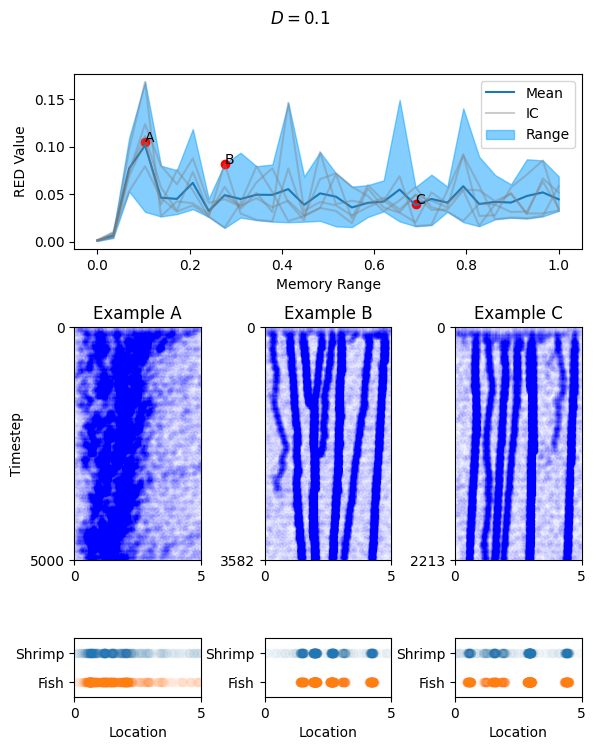

In [19]:
for taxis in [True,False]:
    data = []
    for run in range(10):
        if taxis:
            base_dir=f"./trial_runs/1dmem/1dmem_{run}/d_0.1/"
        else :
            base_dir=f"./trial_runs/1dtaxis/1dtaxis_{run}/d_0.1/"
        dir_list = np.sort(os.listdir(base_dir))
        d = []
        for fil in dir_list:
            s,f = get_final(base_dir+fil+"/")
            d.append(red(s,5))
        data.append(d)
    if taxis:
        pop_out_indexes = [2,8,20]
        pop_out_runs = [3,3,7]
    else:
        pop_out_indexes = [3,8,20]
        pop_out_runs = [3,3,6]
    main_mem_dir = f"/media/jonatank/PG/HML/main_mem_sens/"

    mem_list = np.linspace(0,1,30)

    slice_list = data
    slice_mean = np.mean(data,axis=0)
    slice_var = np.var(data, axis=0)
    slice_max = np.max(data, axis=0)
    slice_min = np.min(data, axis=0)

    fig = plt.figure()
    gs = GridSpec(3,3,  figure = fig, height_ratios=[3,4,1])
    axtop = fig.add_subplot(gs[0,:])
    axtop.plot(mem_list, slice_mean, label="Mean")

    for i in range(5):
        if i ==0:
            axtop.plot(mem_list, slice_list[i], label=f"IC", color="grey", alpha=0.4)
        else:
            axtop.plot(mem_list, slice_list[i], color="grey", alpha=0.4)
    axtop.fill_between(mem_list, slice_max, slice_min - slice_var, alpha=0.5, color='#089fff', label="Range")
    axtop.scatter([mem_list[i] for i in pop_out_indexes], [slice_list[r][i] for r,i in zip(pop_out_runs, pop_out_indexes)], color="r")
    offsets = [[0,0],[0,0],[0, 0]]
    for letter, p in enumerate(pop_out_indexes):
        axtop.text(mem_list[p]+offsets[letter][0], slice_list[pop_out_runs[letter]][p]+ offsets[letter][1], ["A","B","C"][letter])
    axtop.legend()
    axmid = []
    for i in range(3):
        axmid.append(fig.add_subplot(gs[1,i]))
    axbot = []
    for i in range(3):
        axbot.append(fig.add_subplot(gs[2,i]))

    for i in range(3):
        if taxis:
            a = get_all(f"./trial_runs/1dmem/1dmem_{pop_out_runs[i]}/d_0.1/"+dir_list[pop_out_indexes[i]]+"/")
        else:
            a = get_all(f"./trial_runs/1dtaxis/1dtaxis_{pop_out_runs[i]}/d_0.1/"+dir_list[pop_out_indexes[i]]+"/")
        ss = [s[0] for s in a]
        fs = [f[1] for f in a]
        # l=1000
        l=len(ss)-1
        axbot[i].scatter(ss[l], [3/4 for _ in ss[l]], alpha=0.02)
        axbot[i].scatter(fs[l], [1/4 for _ in fs[l]], alpha=0.02)
        # ax[0][0].set_ylabel("Time")
        axbot[i].set_xlabel("Location")
        # axmid[i].set_xlabel("Location")
        for c in range(0,l,round(l/200)):
            axmid[i].scatter(ss[c],np.zeros_like(ss[c])+c,alpha=0.01, color="b",marker=".")
        axmid[i].set_title(f"Example {['A', 'B', 'C'][i]}")
        axmid[i].set_ylim(0,l)
        axmid[i].invert_yaxis()
        axbot[i].set_ylim(0,1)
        axmid[i].set_yticks([0,l])
        axmid[i].set_xticks([0,5])
        axbot[i].set_xticks([0,5])
        axbot[i].set_yticks([1/4,3/4])
        axbot[i].set_yticklabels(["Fish", "Shrimp"])
        axmid[i].set_xlim([0,5])
        axbot[i].set_xlim([0,5])
        if taxis:
            axtop.set_xlabel("Taxis Range")
        else:
            axtop.set_xlabel("Memory Range")



        axtop.set_ylabel("RED Value")

    axmid[0].set_ylabel("Timestep")
    fig.suptitle(f"$D =0.1$")
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    fig.set_figheight(8)
    fig.set_figwidth(6)
    plt.show()

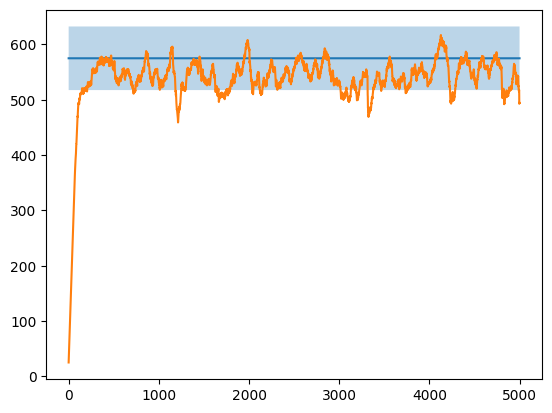

In [18]:
t_index = 3
station_count = 25
fish_count = 1000
initial_energy = 3.0
energy_loss_rate = 0.2
birth_rate = 5
fish_val = 0.1
habitat_width = 5.0

equil_location = ((fish_count)*fish_val + (birth_rate)*initial_energy) / energy_loss_rate
tol=0.1

a = get_all(f"./trial_runs/1dtaxis/1dtaxis_3/d_0.1/"+dir_list[t_index]+"/")
# a = get_all("./trial_runs/high_width_test/")
ss = [s[0] for s in a]
# fs = [f[1] for f in a]
lens = [len(k) for k in ss]
equil_line =np.zeros_like(lens)+equil_location
plt.fill_between(np.arange(len(lens)),equil_line*(1-tol),equil_line*(1+tol),alpha=0.3)
plt.plot(equil_line)
plt.plot(lens)
# window = 1000
# conv_arr = np.ones(window) / window
# conv = np.convolve(conv_arr, lens, "same")
# plt.plot(conv)
# plt.fill_between(np.arange(len(lens)),conv*(1-tol),conv*(1+tol),alpha=0.2)

Problems caused by changing habitat sizes:
- Rust RED function is broken since I wrote it with the assumption that the landscape would only be $[0,1]$. The expectation changes so I have to go back the math and figure out how to generalize it for different landscape sizes.
- Taxis seemed to work but actually didn't because there was some hidden constant scaling factor when the landscape size changed (FIXED)
- Stations don't die when they should????? (FIXED)
- The stopping conditions don't work with a big landscape, not quite sure why. Maybe I can ignore this??